# Figure 7: Receptive field properties in  *rd10* vs. *wild-type* retina

# Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [30]:
import datajoint as dj
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import os
from djimaging.utils.receptive_fields import plot_rf_utils

# --------------------------------------------------------------------

# Helper functions

In [3]:
def plot_scale_bar(ax, x0, y0, size, pad=0, text=None, orientation='h', color='k', text_ha='center', text_va='top',
                   text_x_pad=0):
    if orientation[0] == 'h':
        ax.plot([x0, x0 + size], [y0, y0], solid_capstyle='butt', clip_on=False, color=color)
        if text is not None:
            ax.text(x0 + size / 2 + text_x_pad, y0 + pad, text, va=text_va, ha=text_ha, color=color)
    else:
        ax.plot([x0, x0], [y0, y0 + size], solid_capstyle='butt', clip_on=False, color=color)
        if text is not None:
            ax.text(x0 + size, y0 + size / 2, text, va='center', ha='left', color=color)

In [4]:
def map_p_to_star(p):
    if p <= 0.001:
        return '***'
    elif p <= 0.01:
        return '**'
    elif p <= 0.05:
        return '*'
    else:
        return ''

In [5]:
from statsmodels.stats.multitest import multipletests

def correct_p_values(p_values, alpha=0.05, method='fdr_bh'):
    finite_mask = np.isfinite(p_values)
    finite_values = p_values[finite_mask]

    reject, pvals_corrected_flat, _, _ = multipletests(finite_values, alpha=alpha, method='fdr_bh')

    pvals_corrected = np.full(p_values.shape, np.nan)  # Initialize with NaNs
    pvals_corrected[finite_mask] = pvals_corrected_flat
    
    return pvals_corrected

In [6]:
def test(data1, data2):
    if len(data1) > 3 and len(data2) > 3:
        stat, p = mannwhitneyu(data1, data2, alternative='two-sided')
        return p
    else:
        np.nan

# --------------------------------------------------------------------

# Load data

In [8]:
file_path = 'ADD_YOUR_PATH_TO_DATA_HERE'
file_path = '/gpfs01/euler/User/ndyszkant/PhD/Manuscript/Functional diversity rd10/Figures/submission/data/df_all_rfs.pkl'
all_rf_df = pd.read_pickle(file_path)  
file_path = '/gpfs01/euler/User/ndyszkant/PhD/Manuscript/Functional diversity rd10/Figures/submission/data/qfilt_rf_df.pkl'
qifiltered_rf_df = pd.read_pickle(file_path)  

In [9]:
qifiltered_rf_df.keys()

Index(['experimenter', 'date', 'exp_num', 'raw_id', 'field', 'region',
       'stim_name', 'cond1', 'roi_id', 'preprocess_id', 'dnoise_params_id',
       'rf_glm_params_id'],
      dtype='object')

# --------------------------------------------------------------------

# Plot panel A

In [23]:
n_examples = 3
celltype = 11

#restr = Roi & (CelltypeAssignment & f"celltype={celltype}")

np.random.seed(42)

keys_qfilt_rf = dict()
for mouseline in ['Bl6', 'rd10']:
    keys_qfilt_rf[mouseline] = dict()
    for age in ['P30', 'P45', 'P90']:
        keys = qifiltered_rf_df.keys()
        if len(keys) > n_examples:
            keys_qfilt_rf[mouseline][age] = np.random.choice(keys, n_examples, replace=False)
        else:
            keys_qfilt_rf[mouseline][age] = keys
            
        #for k in keys:
        #   if (rf_db.Roi & k).fetch1('roi_size') != (Roi & k).fetch1('roi_size'):
        #       print(k)
                
            assert len(qfilt_rf_tab & k) == 1

In [24]:
ages = ['P30', 'P45', 'P90']
mouselines = ['Bl6', 'rd10']

ml2col = {
    'Bl6': 'dimgray',
    'rd10': 'magenta',
}

### Load dataframe

In [28]:
file_path = '/gpfs01/euler/User/ndyszkant/PhD/Manuscript/Functional diversity rd10/Figures/submission/data/example_RFs_G11.pkl'
G11_example_df = pd.read_pickle(file_path)  

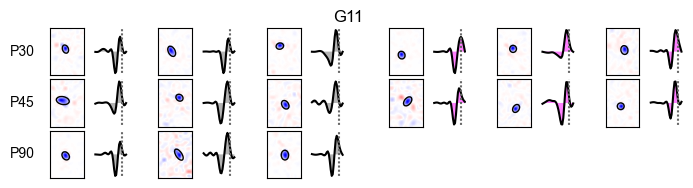

In [44]:
plt.rcParams['font.family'] = 'Arial'
fontsize = 10

fig, axs = plt.subplots(nrows=len(ages), ncols=2 * len(mouselines) * n_examples,
                        figsize=(7, 2.1), width_ratios=(1.3, 1) * 6)

fig.suptitle('G' + str(celltype), y=0.8, va='bottom')


# Iterate through the DataFrame for plotting
           
for i, mouseline in enumerate(mouselines):
    for j, age in enumerate(ages):
        axs[j, 0].set_ylabel(age, rotation=0, labelpad=20, va='center', fontsize=fontsize)
        for k in range(n_examples):
            ax_srf = axs[j, (k * 2) + (i * n_examples * 2)]
            ax_trf = axs[j, (k * 2) + (i * n_examples * 2) + 1]
                    # Turn off unused axes in the grid
        # Turn off unused axes while keeping the frames for sRFs visible
        for ax_row in axs:
            for ax in ax_row:
                if not ax.has_data():  # Check if the axis has any plotted data
                    ax.set_xticks([])  # Remove x-axis ticks
                    ax.set_yticks([])  # Remove y-axis ticks
                    ax.set_xlabel('')  # Remove x-axis label
                    ax.set_ylabel('')  # Remove y-axis label

            if k >= len(keys_qfilt_rf[mouseline][age]):
                ax_srf.axis('off')
                ax_trf.axis('off')
        
                continue
                    
            else:
                key = keys_qfilt_rf[mouseline][age][k]
        # Filter DataFrame for current mouseline and age
        subset = G11_example_df[(G11_example_df['mouseline'] == mouseline) & (G11_example_df['age'] == age)]
        
        for k, row in enumerate(subset.itertuples()):
            if k >= n_examples:
                break
            
            ax_srf = axs[j, (k * 2) + (i * n_examples * 2)]
            ax_trf = axs[j, (k * 2) + (i * n_examples * 2) + 1]

            # Plot the srf
            ax_srf.set(xticks=[], yticks=[])
            plot_rf_utils.plot_srf_gauss_fit(ax=ax_srf, srf=row.srf, srf_params=row.srf_params, vabsmax=row.vabsmax, ms=0)

            # Plot the trf
            ax_trf.axis('off')
            ax_trf.fill_between(row.rf_time, row.trf, np.zeros_like(row.trf), fc=ml2col[mouseline], ec='none', alpha=0.5)
            ax_trf.plot(row.rf_time, row.trf, c='k')
            ax_trf.axvline(0, c='dimgray', ls=(1, (1, 1)))




plt.tight_layout(w_pad=1.1, h_pad=0.3, rect=(0, 0, 1, 1))
    
for ax_col in axs[:, ::2]:
    for ax in ax_col:
        pos1 = ax.get_position()
        pos2 = [pos1.x0 + 0.015, pos1.y0, pos1.width, pos1.height]
        ax.set_position(pos2)
        
for ax in axs[:, :len(mouselines) * n_examples].flat:
    pos1 = ax.get_position()
    pos2 = [pos1.x0 - 0.02, pos1.y0, pos1.width, pos1.height]
    ax.set_position(pos2)
        
y_min = np.min([ax.get_ylim()[0] for ax in axs[:, 1::2].flat])
y_max = np.max([ax.get_ylim()[1] for ax in axs[:, 1::2].flat])
for ax in axs[:, 1::2].flat:
    ax.set_ylim((y_min, y_max))

# Remove empty axes completely (including their frames)
for ax_row in axs:
    for ax in ax_row:
        if not ax.has_data():  # Check if the axis has any plotted data
            ax.axis('off')  # Completely turn off the empty axis


# --------------------------------------------------------------------

# Plot panel B and C

In [10]:
use_really_all = True

filtered_df = all_rf_df.copy()

# Filter cell types for P30 with at least 5 cells in both genlines
p30_data = filtered_df[filtered_df['age'] == 'P30']
celltype_counts = p30_data.groupby(['celltype', 'genline']).size().unstack(fill_value=0)
valid_celltypes = celltype_counts[(celltype_counts['Bl6'] >= 4) & (celltype_counts['rd10'] >= 4)].index

filtered_df = filtered_df[filtered_df['celltype'].isin(valid_celltypes)]

if use_really_all:
    filtered_df_all_types = all_rf_df.copy()
else:
    filtered_df_all_types = filtered_df.copy()
    
filtered_df_all_types['celltype'] = 'all'

plot_df = pd.concat([filtered_df, filtered_df_all_types])
plot_df.celltype = plot_df.celltype.astype(str)
plot_df.head()

,celltype,genline,age,rf_size,lag
"(Dyszkant, 2022-08-05, 2, 1, GCL3, RR, shifty, control, 40, 1, 2, 1, 1)",11,Bl6,P180,108.9330,0.096698
"(Dyszkant, 2022-10-14, 2, 1, GCL1, RR, shifty, control, 55, 1, 2, 1, 1)",11,Bl6,P90,153.5250,0.145946
"(Dyszkant, 2022-10-14, 2, 1, GCL1, RR, shifty, control, 56, 1, 2, 1, 1)",11,Bl6,P90,161.9070,0.142346
"(Dyszkant, 2022-10-14, 2, 1, GCL2, RR, shifty, control, 70, 1, 2, 1, 1)",11,Bl6,P90,96.9296,0.115498
"(Dyszkant, 2023-03-22, 1, 1, GCL1, LR, shifty, control, 36, 1, 2, 1, 1)",11,Bl6,P180,128.4270,0.149746


In [11]:
ages = ['P30', 'P45', 'P90']
ys = ['rf_size', 'lag']
celltypes = filtered_df.celltype.unique().astype(str)
order = np.append(np.append(celltypes, ' '), 'all')
custom_palette = {'Bl6': 'white', 'rd10': 'magenta'}
y2name = dict(rf_size='RF centre size [µm]', lag='Main peak lag [s]')

In [12]:
from scipy.stats import mannwhitneyu

# Do statistic
pvals = np.full((len(ys), len(ages), len(celltypes)), np.nan)
pvals_all = np.full((len(ys), len(ages),), np.nan)

for k, y in enumerate(ys):
    for i, age in enumerate(ages):
        age_df = plot_df[(plot_df.age==age)]
        pvals_all[k, i] = test(age_df[(age_df.genline=='Bl6') & (age_df.celltype=='all')][y], age_df[(age_df.genline=='rd10') & (age_df.celltype=='all')][y])

        for j, celltype in enumerate(celltypes):
            pvals[k, i, j] = test(age_df[(age_df.genline=='Bl6') & (age_df.celltype==celltype)][y], age_df[(age_df.genline=='rd10') & (age_df.celltype==celltype)][y])
                
# Correct p_values
pvals_corrected = pvals.copy()
for k, y in enumerate(ys):
    for i, age in enumerate(ages):        
        pvals_corrected[k, i, :] = correct_p_values(pvals[k, i, :])

/gpfs01/euler/User/ndyszkant/.local/lib/python3.10/site-packages/seaborn/categorical.py:1143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level
/gpfs01/euler/User/ndyszkant/.local/lib/python3.10/site-packages/seaborn/categorical.py:1143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level


   celltype genline  age     rf_size       lag
0        11     Bl6  P30  124.212667  0.129367
1        11    rd10  P30  117.841500  0.083235
2        14     Bl6  P30  143.945400  0.129881
3        14    rd10  P30  109.529033  0.102520
4        17     Bl6  P30  118.289453  0.119070
5        17    rd10  P30  116.607012  0.120191
6        18     Bl6  P30  139.229857  0.091655
7        18    rd10  P30  130.538512  0.086560
8        20     Bl6  P30  119.610800  0.121131
9        20    rd10  P30  126.385500  0.086635
10       21     Bl6  P30  106.308575  0.150096
11       21    rd10  P30  121.817560  0.136306
12       22     Bl6  P30  132.873482  0.113865
13       22    rd10  P30  114.766329  0.118782
14       23     Bl6  P30  137.425125  0.100317
15       23    rd10  P30  117.534262  0.123140
16       31     Bl6  P30  125.962955  0.126204
17       31    rd10  P30  119.997267  0.126538
18       32     Bl6  P30  122.188092  0.127652
19       32    rd10  P30  121.566557  0.130283
20      all  

/gpfs01/euler/User/ndyszkant/.local/lib/python3.10/site-packages/seaborn/categorical.py:1143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level
/gpfs01/euler/User/ndyszkant/.local/lib/python3.10/site-packages/seaborn/categorical.py:1143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level


   celltype genline  age     rf_size       lag
0        11     Bl6  P45  117.425300  0.131528
1        11    rd10  P45  109.920000  0.113380
2        14     Bl6  P45  111.089218  0.137356
3        14    rd10  P45  118.116083  0.097395
4        17     Bl6  P45  122.008270  0.130427
5        17    rd10  P45  114.718085  0.110063
6        18     Bl6  P45  144.634700  0.140097
7        18    rd10  P45  123.740763  0.074267
8        20     Bl6  P45  133.975333  0.183180
9        20    rd10  P45  134.979286  0.068579
10       21     Bl6  P45  105.484200  0.075258
11       21    rd10  P45  123.984269  0.091113
12       22     Bl6  P45  135.520377  0.109032
13       22    rd10  P45  116.499429  0.102284
14       23     Bl6  P45  138.957417  0.103114
15       23    rd10  P45  122.743690  0.086733
16       31     Bl6  P45  118.487531  0.125898
17       31    rd10  P45  115.304739  0.117133
18       32     Bl6  P45  120.652099  0.123308
19       32    rd10  P45  113.803257  0.120802
20      all  

/gpfs01/euler/User/ndyszkant/.local/lib/python3.10/site-packages/seaborn/categorical.py:1143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level
/gpfs01/euler/User/ndyszkant/.local/lib/python3.10/site-packages/seaborn/categorical.py:1143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level


   celltype genline  age     rf_size       lag
0        11     Bl6  P90  132.124873  0.115389
1        14     Bl6  P90  135.485667  0.121345
2        14    rd10  P90  107.003000  0.022400
3        17     Bl6  P90  110.706392  0.126015
4        17    rd10  P90  130.407000  0.113409
5        18     Bl6  P90  147.028286  0.086934
6        18    rd10  P90  143.590750  0.098147
7        20     Bl6  P90  128.899500  0.061048
8        20    rd10  P90  132.676000  0.078173
9        21     Bl6  P90  116.492500  0.209500
10       21    rd10  P90   99.129950  0.139584
11       22     Bl6  P90  144.936552  0.108160
12       22    rd10  P90  139.094300  0.142334
13       23     Bl6  P90  113.729458  0.071519
14       23    rd10  P90  130.589333  0.112047
15       31     Bl6  P90  124.255421  0.121926
16       31    rd10  P90  122.379142  0.139684
17       32     Bl6  P90  133.958012  0.133698
18       32    rd10  P90  126.987300  0.145261
19      all     Bl6  P90  129.199120  0.119632
20      all  

/gpfs01/euler/User/ndyszkant/.local/lib/python3.10/site-packages/seaborn/categorical.py:1143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level
/gpfs01/euler/User/ndyszkant/.local/lib/python3.10/site-packages/seaborn/categorical.py:1143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level


   celltype genline  age     rf_size       lag
0        11     Bl6  P30  124.212667  0.129367
1        11    rd10  P30  117.841500  0.083235
2        14     Bl6  P30  143.945400  0.129881
3        14    rd10  P30  109.529033  0.102520
4        17     Bl6  P30  118.289453  0.119070
5        17    rd10  P30  116.607012  0.120191
6        18     Bl6  P30  139.229857  0.091655
7        18    rd10  P30  130.538512  0.086560
8        20     Bl6  P30  119.610800  0.121131
9        20    rd10  P30  126.385500  0.086635
10       21     Bl6  P30  106.308575  0.150096
11       21    rd10  P30  121.817560  0.136306
12       22     Bl6  P30  132.873482  0.113865
13       22    rd10  P30  114.766329  0.118782
14       23     Bl6  P30  137.425125  0.100317
15       23    rd10  P30  117.534262  0.123140
16       31     Bl6  P30  125.962955  0.126204
17       31    rd10  P30  119.997267  0.126538
18       32     Bl6  P30  122.188092  0.127652
19       32    rd10  P30  121.566557  0.130283
20      all  

/gpfs01/euler/User/ndyszkant/.local/lib/python3.10/site-packages/seaborn/categorical.py:1143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level
/gpfs01/euler/User/ndyszkant/.local/lib/python3.10/site-packages/seaborn/categorical.py:1143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level


   celltype genline  age     rf_size       lag
0        11     Bl6  P45  117.425300  0.131528
1        11    rd10  P45  109.920000  0.113380
2        14     Bl6  P45  111.089218  0.137356
3        14    rd10  P45  118.116083  0.097395
4        17     Bl6  P45  122.008270  0.130427
5        17    rd10  P45  114.718085  0.110063
6        18     Bl6  P45  144.634700  0.140097
7        18    rd10  P45  123.740763  0.074267
8        20     Bl6  P45  133.975333  0.183180
9        20    rd10  P45  134.979286  0.068579
10       21     Bl6  P45  105.484200  0.075258
11       21    rd10  P45  123.984269  0.091113
12       22     Bl6  P45  135.520377  0.109032
13       22    rd10  P45  116.499429  0.102284
14       23     Bl6  P45  138.957417  0.103114
15       23    rd10  P45  122.743690  0.086733
16       31     Bl6  P45  118.487531  0.125898
17       31    rd10  P45  115.304739  0.117133
18       32     Bl6  P45  120.652099  0.123308
19       32    rd10  P45  113.803257  0.120802
20      all  

/gpfs01/euler/User/ndyszkant/.local/lib/python3.10/site-packages/seaborn/categorical.py:1143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level
/gpfs01/euler/User/ndyszkant/.local/lib/python3.10/site-packages/seaborn/categorical.py:1143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level


   celltype genline  age     rf_size       lag
0        11     Bl6  P90  132.124873  0.115389
1        14     Bl6  P90  135.485667  0.121345
2        14    rd10  P90  107.003000  0.022400
3        17     Bl6  P90  110.706392  0.126015
4        17    rd10  P90  130.407000  0.113409
5        18     Bl6  P90  147.028286  0.086934
6        18    rd10  P90  143.590750  0.098147
7        20     Bl6  P90  128.899500  0.061048
8        20    rd10  P90  132.676000  0.078173
9        21     Bl6  P90  116.492500  0.209500
10       21    rd10  P90   99.129950  0.139584
11       22     Bl6  P90  144.936552  0.108160
12       22    rd10  P90  139.094300  0.142334
13       23     Bl6  P90  113.729458  0.071519
14       23    rd10  P90  130.589333  0.112047
15       31     Bl6  P90  124.255421  0.121926
16       31    rd10  P90  122.379142  0.139684
17       32     Bl6  P90  133.958012  0.133698
18       32    rd10  P90  126.987300  0.145261
19      all     Bl6  P90  129.199120  0.119632
20      all  

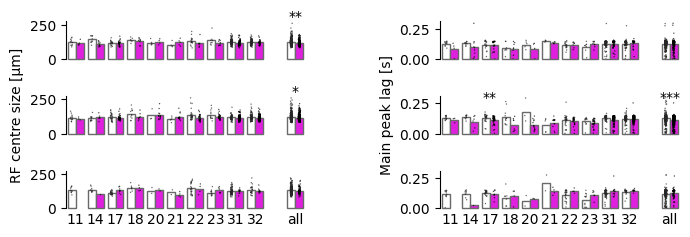

In [13]:
fig, axs = plt.subplots(len(ages), 2, figsize=(7, 2.5), sharex='all', sharey='col')
sns.despine(bottom=True)

for k, y in enumerate(ys):
    y_max = plot_df[y].max()
    for i, age in enumerate(ages):
        age_df = plot_df[plot_df.age==age]
        ax = axs[i, k]
        sns.barplot(ax=ax, data=age_df, x='celltype', y=y, hue='genline', palette=custom_palette, edgecolor="dimgray", clip_on=False, order=order, ci=None)
        sns.stripplot(ax=ax, data=age_df, x='celltype', y=y, hue='genline', s=2, marker='.', dodge=True, color='k', order=order, alpha=0.7) # palette=custom_palette
    
        for j, celltype in enumerate(celltypes):
            ax.text(j, y_max, map_p_to_star(pvals_corrected[k, i, j]), verticalalignment='center', horizontalalignment='center')
            
        ax.text(len(order)-1, y_max, map_p_to_star(pvals_all[k, i]), verticalalignment='center', horizontalalignment='center')

        mean_values = age_df.groupby(['celltype', 'genline','age']).agg({
        'rf_size': 'mean',
        'lag': 'mean'
        }).reset_index()
    
    
        print(mean_values)

    # remove all but central label
    for ax in axs[:, k]:
        ax.set_ylabel('')
    axs[len(ages)//2, k].set_ylabel(y2name[y])
    
for ax in axs.flat:
    ax.tick_params(axis='x', which='both', length=0)
    
for ax in axs.flat:
    ax.set_xlabel(None)
    ax.legend().set_visible(False)        
    
plt.tight_layout(w_pad=6, h_pad=1)  # Adjust spacing
#plt.savefig('figures/RF_analysis.pdf')

## Print p-values

In [14]:
print(pvals_corrected)

[[[0.81128748 0.06233035 0.81128748 0.81128748 0.81128748 0.81128748
   0.18439544 0.58624709 0.15420897 0.85744349]
  [       nan 0.66047188 0.33803392 0.33803392        nan 0.33803392
   0.1822038  0.33803392 0.33803392 0.1822038 ]
  [       nan        nan 0.08092562 1.                nan        nan
   0.99734748 0.53910795 0.99734748 0.99734748]]

 [[0.15873016 0.23541594 0.77886558 0.77886558 0.58956916 0.15873016
   0.77886558 0.41274641 0.3241019  0.20223867]
  [       nan 0.12514544 0.00815352 0.10902067        nan 0.92413632
   0.5699042  0.11342114 0.10404367 0.75525903]
  [       nan        nan 0.50434611 0.64848485        nan        nan
   0.40638289 0.20038785 0.42301106 0.20038785]]]


In [15]:
print(pvals_all)

[[1.44140396e-03 1.33439394e-02 8.29149397e-01]
 [6.16595830e-01 3.83824131e-08 4.09665005e-01]]


# --------------------------------------------------------------------

## Print n

In [16]:
# Filter for P30 only
p30_df = plot_df[plot_df['age'] == 'P30']

# Group by genline and celltype, then count the number of cells
p30_cell_count = p30_df.groupby(['genline', 'celltype'])['rf_size'].count().reset_index()

# Rename the column to 'n_cells'
p30_cell_count.rename(columns={'rf_size': 'n_cells'}, inplace=True)

# Display the resulting DataFrame
print(p30_cell_count)


   genline celltype  n_cells
0      Bl6       11       12
1      Bl6       14       10
2      Bl6       17       19
3      Bl6       18        7
4      Bl6       20        5
5      Bl6       21        4
6      Bl6       22       17
7      Bl6       23        8
8      Bl6       31      111
9      Bl6       32       93
10     Bl6      all      353
11    rd10       11        4
12    rd10       14        9
13    rd10       17       25
14    rd10       18        8
15    rd10       20        4
16    rd10       21        5
17    rd10       22        7
18    rd10       23        8
19    rd10       31       63
20    rd10       32       30
21    rd10      all      185


In [17]:
# Filter for P30 only
p30_df = plot_df[plot_df['age'] == 'P45']

# Group by genline and celltype, then count the number of cells
p30_cell_count = p30_df.groupby(['genline', 'celltype'])['rf_size'].count().reset_index()

# Rename the column to 'n_cells'
p30_cell_count.rename(columns={'rf_size': 'n_cells'}, inplace=True)

# Display the resulting DataFrame
print(p30_cell_count)


   genline celltype  n_cells
0      Bl6       11       13
1      Bl6       14       11
2      Bl6       17       27
3      Bl6       18       11
4      Bl6       20        3
5      Bl6       21        5
6      Bl6       22       30
7      Bl6       23       12
8      Bl6       31       52
9      Bl6       32       97
10     Bl6      all      372
11    rd10       11        3
12    rd10       14        6
13    rd10       17       46
14    rd10       18        8
15    rd10       20       14
16    rd10       21       13
17    rd10       22       28
18    rd10       23       29
19    rd10       31      139
20    rd10       32      162
21    rd10      all      507


In [18]:
# Filter for P30 only
p30_df = plot_df[plot_df['age'] == 'P90']

# Group by genline and celltype, then count the number of cells
p30_cell_count = p30_df.groupby(['genline', 'celltype'])['rf_size'].count().reset_index()

# Rename the column to 'n_cells'
p30_cell_count.rename(columns={'rf_size': 'n_cells'}, inplace=True)

# Display the resulting DataFrame
print(p30_cell_count)


   genline celltype  n_cells
0      Bl6       11       11
1      Bl6       14        9
2      Bl6       17       25
3      Bl6       18        7
4      Bl6       20        2
5      Bl6       21        2
6      Bl6       22       25
7      Bl6       23       12
8      Bl6       31       70
9      Bl6       32       24
10     Bl6      all      263
11    rd10       14        1
12    rd10       17        8
13    rd10       18        4
14    rd10       20        2
15    rd10       21        4
16    rd10       22        4
17    rd10       23        6
18    rd10       31       12
19    rd10       32       10
20    rd10      all       63
